<a href="https://colab.research.google.com/github/Shosh3sb/computer_vision_512/blob/main/CV_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
import time
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Read an image using openCV

In [ ]:
c = cv2.imread('BB.jpg')

In [ ]:
c.shape

(334, 500, 3)

# Display the image using openCV

In [ ]:
cv2.imshow('orginal image', c)
cv2.waitKey()
cv2.destroyAllWindows()

# Convert the image to gray

In [ ]:
begin_time= time.time()
img_gry =cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
end_time= time.time()
img_gry.shape

(334, 500)

In [ ]:
cv2.imshow('gray image',img_gry)
cv2.waitKey()

cv2.destroyAllWindows()

 1. Smoothing the image by using filter2D with trackbar

In [ ]:
Start_time = time.time()
# Define the kernel for smoothing
kernel = np.ones((3,3), np.float32)/25

# Create a window to display the image
cv2.namedWindow('Smoothing')

# Create a function to update the image based on trackbar position
def update_image(val):
    # Smooth the image based on the trackbar position
    smoothed = cv2.filter2D(img_gry, -1, kernel*(val+1))
    cv2.imshow('Smoothing', smoothed)

# Create a trackbar to control the smoothing level
cv2.createTrackbar('Smoothing Level', 'Smoothing', 0, 20, update_image)

# Show the original image
cv2.imshow('Original', img_gry)
End_time = time.time()

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Excution time is :",End_time - Start_time)

 2. Implement Convolution function and smooth the image

In [ ]:
def plot_image(img_gry: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img_gry, cmap='gray');
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(6, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

In [ ]:
#Declare filters for convolutions
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [ ]:
#Implement convolution from scratch
def t_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    start_time= time.time()
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
    end_time=time.time()
    print("Excution time",end_time - start_time)
    return num_pixels

In [ ]:
t_size(img_size=275, kernel_size=3)

Excution time 0.0


273

In [ ]:
t_size(img_size=275, kernel_size=5)

Excution time 0.0


271

In [ ]:
#extract the first 3x3 matrix from our image:
subset = np.array(img_gry)[0:0+3, 0:0+3]
subset

array([[175, 175, 174],
       [175, 175, 174],
       [175, 175, 174]], dtype=uint8)

In [ ]:
#Do an element-wise multiplication between the image and the filter:
np.multiply(subset, sharpen)

array([[   0, -175,    0],
       [-175,  875, -174],
       [   0, -175,    0]])

In [ ]:
np.multiply(subset, blur)

array([[10.9375, 21.875 , 10.875 ],
       [21.875 , 43.75  , 21.75  ],
       [10.9375, 21.875 , 10.875 ]])

In [ ]:
#Sum the elements in the matrix:
np.sum(np.multiply(subset, sharpen))

176

In [ ]:
np.sum(np.multiply(subset, blur))

174.75

In [ ]:
def convolve(img_gry: np.array, kernel: np.array) -> np.array:
    tgt_size = t_size(
        img_size=img_gry.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]

    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))

    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img_gry[i:i+k, j:j+k]

            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))

    return convolved_img

In [ ]:
#test, #Sharpening filter first:
img_sharpened = convolve(img_gry=np.array(img_gry), kernel=sharpen)
img_sharpened


Excution time 0.0


array([[176., 173., 173., ..., 182., 182., 182.],
       [176., 173., 173., ..., 182., 182., 182.],
       [176., 173., 173., ..., 182., 182., 182.],
       ...,
       [174., 173., 177., ..., 185., 185., 185.],
       [174., 174., 172., ..., 185., 185., 185.],
       [174., 174., 173., ..., 184., 185., 185.]])

In [ ]:
#cv2.imshow('Smoothing image', img_sharpened)

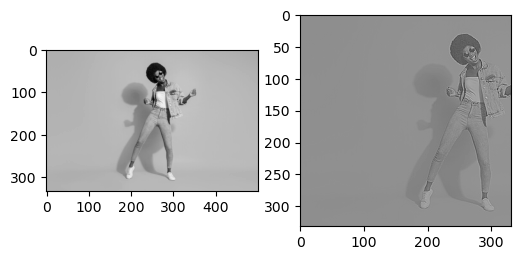

In [ ]:
plot_two_images(
    img1=img_gry,
    img2=img_sharpened
)

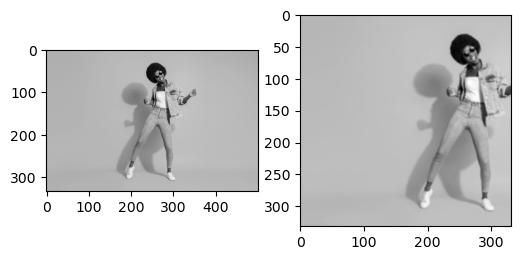

In [ ]:
img_blurred = convolve(img_gry=np.array(img_gry), kernel=blur)
plot_two_images(
    img1=img_gry,
    img2=img_blurred
)

Excution time 0.0


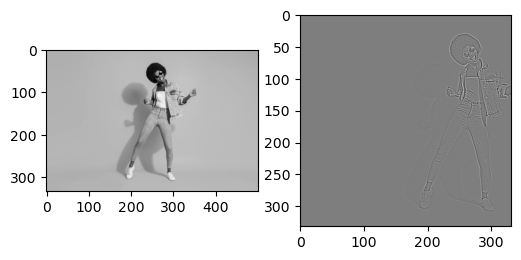

In [ ]:
img_outlined = convolve(img_gry=np.array(img_gry), kernel=outline)
plot_two_images(
    img1=img_gry,
    img2=img_outlined
)

 3. Down sample the image by a factor of 2 with smoothing (before down_sampling) and show it

`
To downsample an image by a factor of 2 with smoothing, we can first apply a low-pass filter to the image to remove high-frequency components, then reduce the image size by a factor of 2 by selecting every other pixel in each dimension.
    `

In [ ]:

# apply a Gaussian blur to smooth the image
img_smooth = cv2.GaussianBlur(img_gry, (5, 5), 0)

# downsample the image by a factor of 2
img_downsampled = img_smooth[::2, ::2]

# show the original and downsampled images
cv2.imshow('Original Image', img_gry)
cv2.imshow('Downsampled Image', img_downsampled)
cv2.waitKey(0)


-1

4 .up sample the image from the previous step by a factor of 2 with smoothing (after up-sampling) show the resulting image and the difference from the original image. When showing the difference , normalize difference values if necessary so that they are visible

In [ ]:
# upscale the image by a factor of 2 using bicubic interpolation
img_upscaled = cv2.resize(img_gry, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# apply a Gaussian blur to smooth the image
img_smooth = cv2.GaussianBlur(img_upscaled, (5, 5), 0)

# display the original, smoothed, and difference images
cv2.imshow('Original Image', img_gry)
cv2.imshow('Upscaled and Smoothed Image', img_smooth)
cv2.waitKey(0)


-1

5. compute the x and y derivatives of an image and display the resulting images. When displaying the derivative images, normalize the obtained values

Excution time 0.0
Excution time 0.0


(-0.5, 331.5, 331.5, -0.5)

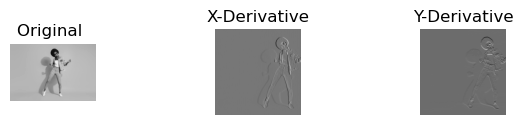

In [ ]:


# Compute x-derivative
x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
x_derivative = convolve(img_gry, x_kernel)
x_derivative = x_derivative / np.max(np.abs(x_derivative))  # Normalize values

# Compute y-derivative
y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
y_derivative = convolve(img_gry, y_kernel)
y_derivative = y_derivative / np.max(np.abs(y_derivative))  # Normalize values

# sobel x gradiant method
sobelX= cv2.Sobel(img_gry, cv2.CV_64F,1,0)
sobelX= np.uint8(np.absolute(sobelX))

# sobel Y gradiant method
sobelY= cv2.Sobel(img_gry, cv2.CV_64F,0,1)
sobelY= np.uint8(np.absolute(sobelY))

# Display images
plt.subplot(1, 5, 1)
plt.imshow(img_gry, cmap="gray")
plt.title("Original ")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(x_derivative, cmap="gray")
plt.title("X-Derivative")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(y_derivative, cmap="gray")
plt.title("Y-Derivative")
plt.axis("off")



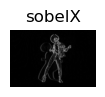

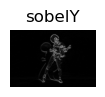

In [ ]:
plt.subplot(1, 5, 4)
plt.imshow(sobelX, cmap="gray")
plt.title("sobelX")
plt.axis("off")
plt.show()

plt.subplot(1, 5, 5)
plt.imshow(sobelY, cmap="gray")
plt.title("sobelY")
plt.axis("off")
plt.show()

6. compute the magnitude of the image gradient in the previous step, and display it. Normalize the diplayed values as needed

In [ ]:
# Compute gradient magnitude0
gradient_magnitude = np.sqrt(x_derivative ** 2 + y_derivative ** 2)
gradient_magnitude = gradient_magnitude / np.max(gradient_magnitude)  # Normalize values

# Compute gradient magnitude from priveus step 1
gradient_magnitude1 = np.sqrt(sobelX ** 2 + sobelY ** 2)
gradient_magnitude1 = gradient_magnitude1 / np.max(gradient_magnitude1)  # Normalize values

# compute magnitude anther way. 2
im = cv2.addWeighted(sobelX, 0.5, sobelY, 0.5, 0)


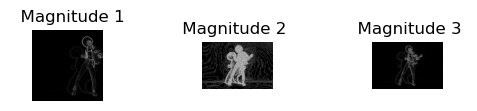

In [ ]:
plt.subplot(1, 6, 1)
plt.imshow(gradient_magnitude, cmap="gray")
plt.title("  Magnitude 1")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(gradient_magnitude1, cmap="gray")
plt.title(" Magnitude 2  ")
plt.axis("off")

plt.subplot(1, 6,5)
plt.imshow(im, cmap="gray")
plt.title("  Magnitude 3 ")
plt.axis("off")
plt.show()

7. Plot the image gradient vectors on top of the original image every N pixel(e.g using short red lines segments of length K)and display the resulting image. Use track bar to control N.

In [ ]:
# Calculate the gradient in x and y directions
grad_x = cv2.Sobel(img_gry, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_gry, cv2.CV_32F, 0, 1, ksize=3)

# Convert the gradients to polar coordinates (magnitude and angle)
magnitude, angle = cv2.cartToPolar(grad_x, grad_y)

# Normalize the magnitude to [0, 1] range
magnitude = cv2.normalize(magnitude, None, 0, 1, cv2.NORM_MINMAX)

# Convert the angle from radians to degrees
angle_degrees = np.rad2deg(angle)

# Create a blank image to draw the gradient vectors
h, w = img_gry.shape
canvas = np.zeros((h, w, 3), dtype=np.uint8)
canvas[..., 0] = img_gry
canvas[..., 1] = img_gry
canvas[..., 2] = img_gry

# Define the length of the gradient vectors to be drawn
vector_len = 40

# Draw the gradient vectors on the canvas
for y in range(0, h, 10):
    for x in range(0, w, 10):
        # Get the magnitude and angle of the gradient at this pixel
        mag = magnitude[y, x]
        angle = angle_degrees[y, x]

        # Calculate the endpoint of the vector
        dx = int(np.cos(np.deg2rad(angle)) * mag * vector_len)
        dy = int(np.sin(np.deg2rad(angle)) * mag * vector_len)
        pt2 = (x + dx, y + dy)

        # Draw the vector on the canvas
        cv2.arrowedLine(canvas, (x, y), pt2, (0, 0, 255), 1)

# Display the image with gradient vectors
cv2.imshow('Gradient Vectors', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def draw_vectors(img, n, k):
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    mag, ang = cv2.cartToPolar(dx, dy)

    h, w = img.shape[:2]
    for y in range(0, h, n):
        for x in range(0, w, n):
            angle = ang[y, x]
            magnitude = mag[y, x]
            if magnitude > 100:
                x2 = int(x + magnitude * np.cos(angle))
                y2 = int(y + magnitude * np.sin(angle))
                cv2.line(img, (x, y), (x2, y2), (0, 0, 255), 2)

    cv2.imshow("Image", img)

def on_trackbar(val):
    if val == 0:
        val = 1
    draw_vectors(image.copy(), val, 3)

# Load the image
image = cv2.imread("BB.jpg", cv2.IMREAD_GRAYSCALE)

# Create a window and trackbar
cv2.namedWindow("Image")
cv2.createTrackbar("N", "Image", 1, 50, on_trackbar)

# Show the image and wait for a key press
cv2.imshow("Image", image)
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()


8. Detect and display corners in an image using openCV Harris corner detection function (cornerHharris). Show the results using red dots. Use track bar to control the number of control point shown

In [ ]:
# Set the maximum number of corner points to be shown
max_points = 100

# Load the image
img = cv2.imread('RU.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corner points using Harris corner detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

# Normalize the corner response values to [0, 1]
cv2.normalize(dst, dst, 0, 1, cv2.NORM_MINMAX)

# Find the coordinates of the local maxima in the corner response map
threshold = 0.01
local_maxima = np.argwhere((dst > threshold) & (dst == cv2.dilate(dst, (3, 3))))

# Sort the corner points in descending order based on their response value
sorted_points = sorted(local_maxima, key=lambda x: dst[x[0], x[1]], reverse=True)

# Initialize an empty list to store the selected corner points
selected_points = []

# Implement non-maximum suppression
for point in sorted_points:
    if len(selected_points) >= max_points:
        break
    for selected_point in selected_points:
        if np.linalg.norm(point - selected_point) < 10:
            break
    else:
        selected_points.append(point)

# Create a track bar to control the number of corner points shown
def update_points(val):
    global selected_points, img
    num_points = cv2.getTrackbarPos('Number of points', 'image')
    img_copy = img.copy()
    for point in selected_points[:num_points]:
        cv2.circle(img_copy, tuple(point[::-1]), 5, (0, 0, 255), -1)
    cv2.imshow('image', img_copy)

cv2.namedWindow('image')
cv2.createTrackbar('Number of points', 'image', 0, len(selected_points), update_points)

# Display the image with the selected number of corner points
update_points(0)
cv2.waitKey(0)
cv2.destroyAllWindows()


 9. Scan the image with a window.At each window location , compute the correlation matrix and its eigen values. Multiply the eigenvalues you compute to get a "cornerness" measure. Display the "corness" measure making sure to normalize values as needed so that the measure is visible.

In [ ]:


def harris_corner_detection(image, window_size, k):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute derivatives of the image
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Compute the elements of the Harris matrix
    Ixx = dx ** 2
    Ixy = dx * dy
    Iyy = dy ** 2

    # Create a window for computing the correlation matrix
    window = np.ones((window_size, window_size))

    # Compute the sum of the elements of the Harris matrix in each window
    Sxx = cv2.filter2D(Ixx, -1, window)
    Sxy = cv2.filter2D(Ixy, -1, window)
    Syy = cv2.filter2D(Iyy, -1, window)

    # Compute the eigenvalues of the correlation matrix
    det = (Sxx * Syy) - (Sxy ** 2)
    trace = Sxx + Syy
    lambda1 = (trace + np.sqrt(trace ** 2 - 4 * det)) / 2
    lambda2 = (trace - np.sqrt(trace ** 2 - 4 * det)) / 2

    # Compute the "cornerness" measure
    cornerness = lambda1 * lambda2 - k * (lambda1 + lambda2) ** 2

    # Normalize the "cornerness" measure
    cv2.normalize(cornerness, cornerness, 0, 1500, cv2.NORM_MINMAX)
    cornerness = cv2.convertScaleAbs(cornerness)

    return cornerness

# Load the image
image = cv2.imread("BB.jpg")

# Compute the "cornerness" measure with a window size of 5 and k=0.04
cornerness = harris_corner_detection(image, 5, 0.04)
cv2.imshow("original", image)
# Display the "cornerness" measure
cv2.imshow("Cornerness", cornerness)
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()





10. Train a simple convolution network to perform MINIST digit classification and report the accuracy you recive on a validation set. Smooth the images (thus degrading them)train the network, evaluate results, and report accuracy. Repeat the smoothing several times (thus increasingly degrading the images and report the accuracy.

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train / 255.0
y_train = to_categorical(y_train)

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.0
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 22s 45ms/step - loss: 0.3202 - accuracy: 0.9020 - val_loss: 0.0619 - val_accuracy: 0.9799
Epoch 2/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0981 - accuracy: 0.9709 - val_loss: 0.0486 - val_accuracy: 0.9840
Epoch 3/5
469/469 [==============================] - 26s 54ms/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 4/5
469/469 [==============================] - 24s 51ms/step - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0329 - val_accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0248 - accuracy: 0.9918
Test loss: 0.02484176680445671
Test accuracy: 0.9918000102043152


In [ ]:
# Preprocess the data with image smoothing
x_train_smooth = []
for img in x_train:
    img = cv2.GaussianBlur(img, (3, 3), 0)
    x_train_smooth.append(img)
x_train_smooth = np.array(x_train_smooth).reshape((60000, 28, 28, 1))
x_train_smooth = x_train_smooth / 255.0

x_test_smooth = []
for img in x_test:
    img = cv2.GaussianBlur(img, (3, 3), 0)
    x_test_smooth.append(img)
x_test_smooth = np.array(x_test_smooth).reshape((10000, 28, 28, 1))
x_test_smooth = x_test_smooth / 255.0

# Train the model with smoothed images
model.fit(x_train_smooth, y_train, epochs=5, batch_size=128, validation_data=(x_test_smooth, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_smooth, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 21s 45ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 23s 49ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
469/469 [==============================] - 23s 50ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/5
469/469 [==============================] - 24s 52ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1135
Test loss: 2.300978899002075
Test accuracy: 0.11349999904632568


11. Repeat the previous step, except that now you compute the magnitude of image gradients before feeding them into the network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train / 255.0
y_train = to_categorical(y_train)

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.0
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 22s 44ms/step - loss: 0.2906 - accuracy: 0.9117 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0901 - accuracy: 0.9736 - val_loss: 0.0390 - val_accuracy: 0.9867
Epoch 3/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0668 - accuracy: 0.9808 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0288 - val_accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0256 - accuracy: 0.9920
Test loss: 0.025645822286605835
Test accuracy: 0.9919999837875366


In [ ]:
# Preprocess the data with image smoothing
x_train_mag = []
for img in x_train:
    # sobel X gradiant method
    sobelX= cv2.Sobel(img, cv2.CV_64F,1,0)
    sobelX= np.uint8(np.absolute(sobelX))
    # sobel Y gradiant method
    sobelY= cv2.Sobel(img, cv2.CV_64F,0,1)
    sobelY= np.uint8(np.absolute(sobelY))
    img= cv2.addWeighted(sobelX, 0.5, sobelY, 0.5, 0)
    x_train_mag.append(img)
x_train_mag = np.array(x_train_mag).reshape((60000, 28, 28, 1))
x_train_mag = x_train_mag / 255.0

x_test_mag = []
for img in x_test:
    # sobel x gradiant method
    sobelX= cv2.Sobel(img, cv2.CV_64F,1,0)
    sobelX= np.uint8(np.absolute(sobelX))
    # sobel Y gradiant method
    sobelY= cv2.Sobel(img, cv2.CV_64F,0,1)
    sobelY= np.uint8(np.absolute(sobelY))
    img= cv2.addWeighted(sobelX, 0.5, sobelY, 0.5, 0)
    x_test_mag.append(img)
x_test_mag = np.array(x_test_mag).reshape((10000, 28, 28, 1))
x_test_mag = x_test_mag / 255.0

# Train the model
model.fit(x_train_mag, y_train, epochs=5, batch_size=128, validation_data=(x_test_mag, y_test))


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_mag, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)



Epoch 1/5
469/469 [==============================] - 22s 47ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 28s 60ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
469/469 [==============================] - 30s 63ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
469/469 [==============================] - 24s 51ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1135
Test loss: 2.301032543182373
Test accuracy: 0.11349999904632568
